# Part 1.1


In [31]:
# imports
from __future__ import annotations
from typing import List, Dict, Tuple, Any, Optional
import math
import sys
import random
import matplotlib.pyplot as plt
import numpy as np

In [32]:
class RBNode:

    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None
        self.colour = "R"

    def get_uncle(self):
        return

    def is_leaf(self):
        return self.left == None and self.right == None

    def is_left_child(self):
        return self == self.parent.left

    def is_right_child(self):
        return not self.is_left_child()

    def is_red(self):
        return self.colour == "R"

    def is_black(self):
        return not self.is_red()

    def make_black(self):
        self.colour = "B"

    def make_red(self):
        self.colour = "R"

    def get_brother(self):
        if self.parent.right == self:
            return self.parent.left
        return self.parent.right


class RBNode:

    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None
        self.colour = "R"

    def get_uncle(self):
        return

    def is_leaf(self):
        return self.left == None and self.right == None

    def is_left_child(self):
        return self == self.parent.left

    def is_right_child(self):
        return not self.is_left_child()

    def is_red(self):
        return self.colour == "R"

    def is_black(self):
        return not self.is_red()

    def make_black(self):
        self.colour = "B"

    def make_red(self):
        self.colour = "R"

    def get_brother(self):
        if self.parent.right == self:
            return self.parent.left
        return self.parent.right

    def rotate_right(self, root):
        parent = self.parent
        leftChild = self.left

        self.left = leftChild.right

        if None != leftChild.right:
            leftChild.right.parent = self

        leftChild.parent = self.parent

        if None == self.parent:
            root = leftChild
        elif self == self.parent.right:
            self.parent.right = leftChild
        else:
            self.parent.left = leftChild

        leftChild.right = self
        self.parent = leftChild

        return root

    def rotate_left(self, root):
        # parent = self.parent
        rightChild = self.right

        self.right = rightChild.left

        if None != rightChild.left:
            rightChild.left.parent = self

        rightChild.parent = self.parent

        if None == self.parent:
            root = rightChild
        elif self == self.parent.left:
            self.parent.left = rightChild
        else:
            self.parent.right = rightChild

        rightChild.left = self
        self.parent = rightChild

        return root

In [33]:

class RBTree:

    def __init__(self,):
        self.root = None

    def is_empty(self,):
        return self.root == None

    def get_height(self,):
        if self.is_empty():
            return 0
        return self.__get_height(self.root)

    def __get_height(self, node):
        if node == None:
            return 0
        return 1 + max(self.__get_height(node.left), self.__get_height(node.right))

    def insert(self, value):
        if self.is_empty():
            self.root = RBNode(value)
            self.root.make_black()
        else:
            self.__insert(self.root, value)

    def __insert(self, node, value):
        if value < node.value:
            if node.left == None:
                node.left = RBNode(value)
                node.left.parent = node
                self.fix(node.left)
            else:
                self.__insert(node.left, value)
        else:
            if node.right == None:
                node.right = RBNode(value)
                node.right.parent = node
                self.fix(node.right)
            else:
                self.__insert(node.right, value)

    def fix(self, node):
        parent = node.parent

        if None == parent:
            node.make_black()
            return

        if parent.is_black():
            return

        grandparent = parent.parent

        if None == grandparent:
            parent.make_black()
            return

        uncle = node.get_uncle()

        if None != uncle and uncle.is_red():
            parent.make_black()
            grandparent.make_red()
            uncle.make_black()

            self.fix(grandparent)
        elif grandparent.left == parent:
            if parent.right == node:
                self.root = parent.rotate_left(self.root)
                parent = node

            self.root = grandparent.rotate_right(self.root)

            parent.make_black()
            grandparent.make_red()
        else:
            if parent.left == node:
                self.root = parent.rotate_right(self.root)
                parent = node

            self.root = grandparent.rotate_left(self.root)

            parent.make_black()
            grandparent.make_red()

    def __str__(self):
        if self.is_empty():
            return "[]"
        return "[" + self.__str_helper(self.root) + "]"

    def __str_helper(self, node):
        if node.is_leaf():
            return "[" + str(node) + "]"
        if node.left == None:
            return "[" + str(node) + " -> " + self.__str_helper(node.right) + "]"
        if node.right == None:
            return "[" + self.__str_helper(node.left) + " <- " + str(node) + "]"
        return "[" + self.__str_helper(node.left) + " <- " + str(node) + " -> " + self.__str_helper(node.right) + "]"

    def print_tree(self):
        self.__print_helper(self.root, "", True)

    def __print_helper(self, node, indent, last):
        if node != None:
            sys.stdout.write(indent)
            if last:
                sys.stdout.write("R----")
                indent += "     "
            else:
                sys.stdout.write("L----")
                indent += "|    "

            s_color = "RED" if node.is_red() else "BLACK"
            print(str(node.value) + "(" + s_color + ")")
            self.__print_helper(node.left, indent, False)
            self.__print_helper(node.right, indent, True)

In [34]:
class TreeNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
    
    def is_leaf(self):
        return self.left == None and self.right == None
    
    def __str__(self):
        return str(self.key)

class BSTree:
    def __init__(self):
        self.root = None

    def is_empty(self):
        return self.root is None

    def insert(self, key):
        if not self.root:
            self.root = TreeNode(key)
        else:
            self._insert_recursive(self.root, key)

    def _insert_recursive(self, node, key):
        if key < node.key:
            if node.left is None:
                node.left = TreeNode(key)
            else:
                self._insert_recursive(node.left, key)
        elif key > node.key:
            if node.right is None:
                node.right = TreeNode(key)
            else:
                self._insert_recursive(node.right, key)

    def inorder_traversal(self):
        if self.root:
            self._inorder_traversal_recursive(self.root)

    def _inorder_traversal_recursive(self, node):
        if node:
            self._inorder_traversal_recursive(node.left)
            print(node.key, end=" ")
            self._inorder_traversal_recursive(node.right)

    def get_height(self):
        return self._get_height_recursive(self.root)

    def _get_height_recursive(self, node):
        if node is None:
            return 0
        left_height = self._get_height_recursive(node.left)
        right_height = self._get_height_recursive(node.right)
        return 1 + max(left_height, right_height)
    
    def search(self, key):
        return self._search_recursive(self.root, key)

    def _search_recursive(self, node, key):
        if node is None or node.key == key:
            return node
        if key < node.key:
            return self._search_recursive(node.left, key)
        return self._search_recursive(node.right, key)

# Part 1.2


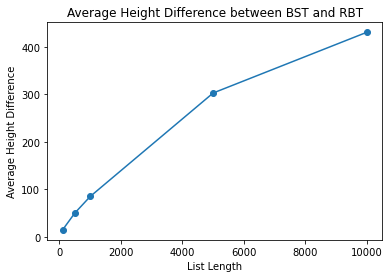

In [35]:


def generate_random_list(length):
    return [random.randint(1, 1000) for _ in range(length)]

def average_height_difference(num_lists, list_length):
    bst_heights = []
    rbt_heights = []
    for _ in range(num_lists):
        random_list = generate_random_list(list_length)
        bst = BSTree()
        rbt = RBTree()

        for key in random_list:
            bst.insert(key)
            rbt.insert(key) 
        
        bst_height = bst.get_height()
        rbt_height = rbt.get_height()  

        bst_heights.append(bst_height)
        rbt_heights.append(rbt_height)

    avg_bst_height = np.mean(bst_heights)
    avg_rbt_height = np.mean(rbt_heights)
    avg_height_diff = np.abs(avg_bst_height - avg_rbt_height)
    return avg_height_diff

def plot_average_height_difference(num_lists, list_lengths):
    avg_height_diffs = []
    for length in list_lengths:
        avg_diff = average_height_difference(num_lists, length)
        avg_height_diffs.append(avg_diff)

    plt.plot(list_lengths, avg_height_diffs, marker='o')
    plt.xlabel('List Length')
    plt.ylabel('Average Height Difference')
    plt.title('Average Height Difference between BST and RBT')
    plt.show()


num_lists = 10  # Number of random lists to generate
list_lengths = [100, 500, 1000, 5000, 10000]  # Length of each random list
plot_average_height_difference(num_lists, list_lengths)

# Part 1.3


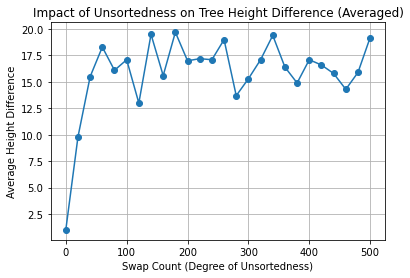

In [36]:
def generate_sorted_list(length):
    return list(range(1, length + 1))

def introduce_unsortedness(sorted_list, swap_count):
    # Introduce unsortedness by performing a number of random swaps
    for _ in range(swap_count):
        index1, index2 = random.sample(range(len(sorted_list)), 2)
        sorted_list[index1], sorted_list[index2] = sorted_list[index2], sorted_list[index1]

def run_experiment(num_rounds, list_length, max_swap_count):
    height_differences = []

    for _ in range(num_rounds):
        sorted_list = generate_sorted_list(list_length)
        round_differences = []

        for swap_count in range(0, max_swap_count + 1, 20):
            bst = BSTree()
            rbt = RBTree()

            introduce_unsortedness(sorted_list, swap_count)

            # Build BST and RBT
            for key in sorted_list:
                bst.insert(key)
                rbt.insert(key)

            # Record height difference
            bst_height = bst.get_height()
            rbt_height = rbt.get_height()
            height_difference = abs(bst_height - rbt_height)
            round_differences.append(height_difference)

        height_differences.append(round_differences)

    # Calculate average height difference for each swap count
    averaged_height_differences = []
    for i in range(len(height_differences[0])):
        total = sum(round_differences[i] for round_differences in height_differences)
        average = total / num_rounds
        averaged_height_differences.append((i * 20, average))

    return averaged_height_differences

def plot_results(height_differences):
    swap_counts, differences = zip(*height_differences)
    plt.plot(swap_counts, differences, marker='o')
    plt.xlabel('Swap Count (Degree of Unsortedness)')
    plt.ylabel('Average Height Difference')
    plt.title('Impact of Unsortedness on Tree Height Difference (Averaged)')
    plt.grid(True)
    plt.show()

num_rounds = 10
list_length = 100
max_swap_count = 500
height_differences = run_experiment(num_rounds, list_length, max_swap_count)
plot_results(height_differences)

# Part 2.1


In [7]:
# Helper function to perform binary search
def binary_search(arr, x):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] < x:
            left = mid + 1
        elif arr[mid] > x:
            right = mid - 1
        else:
            return mid  # x is at mid
    return -1


class DynamicArray:
    def __init__(self, n=0):
        self.n = n  # Total number of elements
        self.k = math.ceil(math.log2(n + 1)) if n > 0 else 0
        self.arrays = [[] for _ in range(self.k)]

    def search(self, x):
        for array in self.arrays:
            index = binary_search(array, x)
            if index != -1:
                return True
        return False

    def insert(self, x):
        carry = [x]
        for i in range(self.k):
            self.arrays[i], carry = self.merge(self.arrays[i], carry)
            if not carry:
                break

        if carry:
            self.arrays.append(carry)
            self.k += 1

        self.n += 1

    def delete(self, x):
        for array in self.arrays:
            index = binary_search(array, x)
            if index != -1:
                array.pop(index)
                self.n -= 1
                break

        while self.n < 2**(self.k - 1) - 1 and self.k > 0:
            self.arrays.pop()
            self.k -= 1

    def merge(self, a, b):
        merged = sorted(a + b)
        if len(merged) > 2 ** len(a):
            return merged[:2 ** len(a)], merged[2 ** len(a):]
        else:
            return merged, []

# Part 2.2


In [10]:
def binary_search_1(item_list, to_find):
    lower = 0
    upper = len(item_list)-1
    while lower < upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper = mid
    return item_list[lower] == to_find


def binary_search_2(item_list, to_find):
    lower = 0
    upper = len(item_list)-1
    while lower <= upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper = mid-1
    return item_list[lower] == to_find


def binary_search_3(item_list, to_find):
    left = 0
    right = len(item_list)-1
    while left != right:
        mid = (left+right)//2
        if item_list[mid] < to_find:
            left = mid+1
        elif item_list[mid] > to_find:
            right = mid
        else:
            return True
    return item_list[left] == to_find

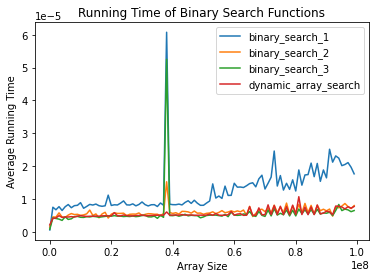

In [12]:
import timeit
import matplotlib.pyplot as plt
import random

array_sizes = range(1, 100_000_000, 1_000_000)
trials = 10

binary_search_1_times = []
binary_search_2_times = []
binary_search_3_times = []
dynamic_array_search_times = []

for size in array_sizes:
    total_time_bs1 = 0
    total_time_bs2 = 0
    total_time_bs3 = 0
    total_time_da = 0

    # Generate random array
    arr = [i for i in range(size)]

    # Choose a random element at index i
    i = random.randint(0, size - 1)
    element = arr[i]

    # Measure the running time of binary_search_1
    time_bs1 = timeit.timeit(
        lambda: binary_search_1(arr, element), number=10)
    total_time_bs1 += time_bs1

    # Measure the running time of binary_search_2
    time_bs2 = timeit.timeit(
        lambda: binary_search_2(arr, element), number=10)
    total_time_bs2 += time_bs2

    # Measure the running time of binary_search_3
    time_bs3 = timeit.timeit(
        lambda: binary_search_3(arr, element), number=10)
    total_time_bs3 += time_bs3

    d = DynamicArray(size)
    map(lambda x: d.insert(x), arr)
    time_da = timeit.timeit(lambda: d.search(element), number=10)
    total_time_da += time_da

    # Append total running times to lists
    binary_search_1_times.append(total_time_bs1 / 10)
    binary_search_2_times.append(total_time_bs2 / 10)
    binary_search_3_times.append(total_time_bs3 / 10)
    dynamic_array_search_times.append(total_time_da / 10)


# Plot the running times
plt.plot(array_sizes, binary_search_1_times, label='binary_search_1')
plt.plot(array_sizes, binary_search_2_times, label='binary_search_2')
plt.plot(array_sizes, binary_search_3_times, label='binary_search_3')
plt.plot(array_sizes, dynamic_array_search_times, label='dynamic_array_search')
plt.xlabel('Array Size')
plt.ylabel('Average Running Time')
plt.title('Running Time of Binary Search Functions')
plt.legend()
plt.show()

Reflection:

Since we are doing a binary search, we can reasonably choose a very high list size for the size of the array we want to test with (as much as can fit into program memory) since the search operation is meant to run in log n time. The question asks us to address the following

- When does binary search outperform other algorithms?
- When is it overkill?

We hypothesize that like many complex algorithms, more simple, but less optimized algorithms outperform it. This is the case for bubble vs merge sort on shorter arrays, as an array access/write is actually much faster than pushing to the call stack, which is used in recursive merge sort.

We will create random lists of sizes ranging from 10 to 10,000,000 characters. We chose 1,000,000 as the upper bound because this seems to be the upper bound before python starts to get slow on most computers.

All lists will be unsorted as well, and we will run the list of each size in trials of 100

### Analysis of results

We can see that the dynamic array is generally more predictable in terms of the increase in speed between trials, however the actual performance gain is not significant, even being beaten by some of the more simple algorithms. Binary search 3 seems to be on-par with the dynamic array, even beating it for certain trials. This could potentially be becuase of memory overhead, or just because the actual theoretical performance gains of the algorithm are made negligable due to the additional overhead of algorithm complexity.

The dynamo array also seems to be overkill for arrays of sizes less than 1000, simpler algorithms outperform when the array is less than 1000 elements.

To conclude, we think that the Dynamic array binary search algorithm is overkill, It provides little benefit for arrays within the sizes we tested, and for larger arrays, It would be more beneficial to use an _external searching algorithm_ or concurrent searching algorithms to find if a value exists in an array of memory.


# Saad (Khalis68) -> 2.2

# Jenil (maruj) -> 2.1

# Pritha (sahap) -> 1.1, 1.2, 2.3
